# ANN & Experimentation
## Wisconsin Breast Cancer Diagnosis Prediction
## Importing Packages 

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [163]:
diagnosis = pd.read_csv("wisconsin_breast_cancer_diagnosis.csv")

In [164]:
diagnosis= diagnosis[pd.notnull(diagnosis['diagnosis'])]

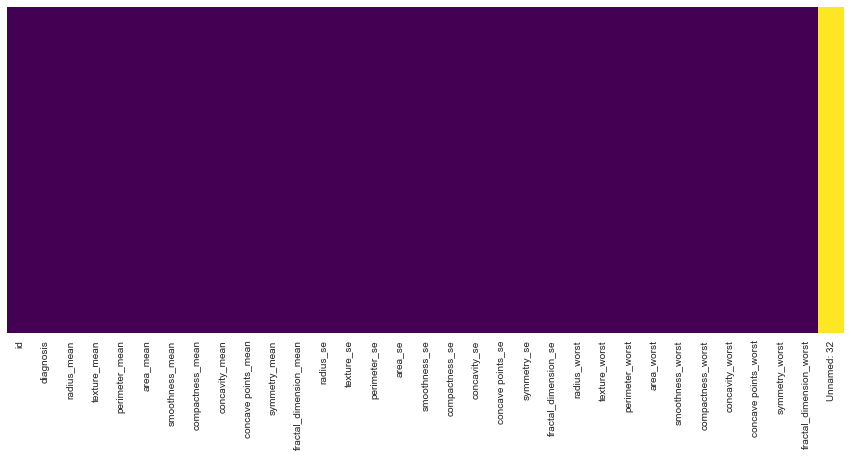

In [165]:
sns.heatmap(diagnosis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [166]:
diagnosis.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [167]:
diagnosis.iloc[:,2:32].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [168]:

diagnosis.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [169]:


X = diagnosis.iloc[:,2:32]  
y = diagnosis.iloc[:,1]
y.replace(['B', 'M'], [0, 1], inplace=True)


In [170]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)


In [171]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)

In [172]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

Epoch 1/20
278/278 [==============================] - 20s 73ms/step - loss: 0.6871 - acc: 0.6223
Epoch 2/20
278/278 [==============================] - 0s 1ms/step - loss: 0.6251 - acc: 0.6223
Epoch 3/20
278/278 [==============================] - 0s 1ms/step - loss: 0.4542 - acc: 0.7734
Epoch 4/20
278/278 [==============================] - 0s 1ms/step - loss: 0.3352 - acc: 0.9496
Epoch 5/20
278/278 [==============================] - 0s 1ms/step - loss: 0.2798 - acc: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 2ms/step - loss: 0.2291 - acc: 0.9784
Epoch 7/20
278/278 [==============================] - 0s 2ms/step - loss: 0.1838 - acc: 0.9784
Epoch 8/20
278/278 [==============================] - 0s 1ms/step - loss: 0.1473 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 1ms/step - loss: 0.1237 - acc: 0.9820
Epoch 10/20
278/278 [==============================] - 0s 1ms/step - loss: 0.1060 - acc: 0.9856
Epoch 11/20
278/278 [==========================

In [173]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [174]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 98.92%
Test accuracy = 95.91%


### Experiment 1
#### Number of hidden layers in NN

In [14]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

Epoch 1/4
278/278 [==============================] - 0s 922us/step - loss: 0.6714 - acc: 0.8633
Epoch 2/4
278/278 [==============================] - 0s 341us/step - loss: 0.5864 - acc: 0.9317
Epoch 3/4
278/278 [==============================] - 0s 238us/step - loss: 0.4435 - acc: 0.9532
Epoch 4/4
278/278 [==============================] - 0s 225us/step - loss: 0.3113 - acc: 0.9568
Epoch 1/4
278/278 [==============================] - 1s 2ms/step - loss: 0.6888 - acc: 0.6583
Epoch 2/4
278/278 [==============================] - 0s 436us/step - loss: 0.6414 - acc: 0.8957
Epoch 3/4
278/278 [==============================] - 0s 284us/step - loss: 0.4726 - acc: 0.9460
Epoch 4/4
278/278 [==============================] - 0s 453us/step - loss: 0.2666 - acc: 0.9532
Epoch 1/4
278/278 [==============================] - 1s 2ms/step - loss: 0.6909 - acc: 0.6223
Epoch 2/4
278/278 [==============================] - 0s 365us/step - loss: 0.6668 - acc: 0.6403
Epoch 3/4
278/278 [=========================

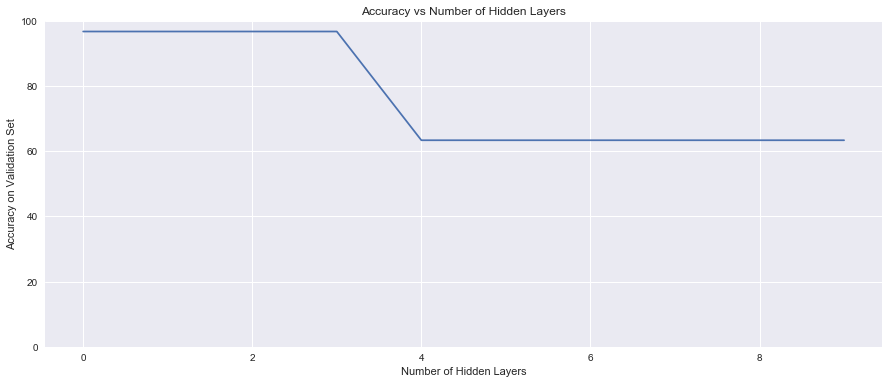

In [15]:

plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

As we see, Number of Hidden layers decrease accuracy after 3rd layer
we will keep only 3 hidden layer in the NN
#### Experiment 2
No of Nodes in Hidden Layer

In [19]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(10,20):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 30))
    
    #  Hidden Layers
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))
 

    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count =  count +1

Epoch 1/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6920 - acc: 0.6151
Epoch 2/20
278/278 [==============================] - 0s 246us/step - loss: 0.6890 - acc: 0.6223
Epoch 3/20
278/278 [==============================] - 0s 266us/step - loss: 0.6756 - acc: 0.6223
Epoch 4/20
278/278 [==============================] - 0s 242us/step - loss: 0.5983 - acc: 0.6871
Epoch 5/20
278/278 [==============================] - 0s 275us/step - loss: 0.4008 - acc: 0.9460
Epoch 6/20
278/278 [==============================] - 0s 255us/step - loss: 0.2400 - acc: 0.9748
Epoch 7/20
278/278 [==============================] - 0s 276us/step - loss: 0.1419 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 266us/step - loss: 0.0984 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 260us/step - loss: 0.0805 - acc: 0.9820
Epoch 10/20
278/278 [==============================] - 0s 356us/step - loss: 0.0721 - acc: 0.9856
Epoch 11/20
278/278 [==========

278/278 [==============================] - 0s 334us/step - loss: 0.4612 - acc: 0.6223
Epoch 5/20
278/278 [==============================] - 0s 333us/step - loss: 0.3432 - acc: 0.6223
Epoch 6/20
278/278 [==============================] - 0s 259us/step - loss: 0.3036 - acc: 0.9748
Epoch 7/20
278/278 [==============================] - 0s 255us/step - loss: 0.2518 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 171us/step - loss: 0.1526 - acc: 0.9892
Epoch 9/20
278/278 [==============================] - 0s 245us/step - loss: 0.0816 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 227us/step - loss: 0.0634 - acc: 0.9892
Epoch 11/20
278/278 [==============================] - 0s 157us/step - loss: 0.0574 - acc: 0.9892
Epoch 12/20
278/278 [==============================] - 0s 249us/step - loss: 0.0546 - acc: 0.9892
Epoch 13/20
278/278 [==============================] - 0s 172us/step - loss: 0.0524 - acc: 0.9892
Epoch 14/20
278/278 [================

278/278 [==============================] - 0s 230us/step - loss: 0.0633 - acc: 0.9892
Epoch 9/20
278/278 [==============================] - 0s 213us/step - loss: 0.0572 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 176us/step - loss: 0.0544 - acc: 0.9892
Epoch 11/20
278/278 [==============================] - 0s 226us/step - loss: 0.0525 - acc: 0.9892
Epoch 12/20
278/278 [==============================] - 0s 153us/step - loss: 0.0508 - acc: 0.9892
Epoch 13/20
278/278 [==============================] - 0s 215us/step - loss: 0.0485 - acc: 0.9892
Epoch 14/20
278/278 [==============================] - 0s 233us/step - loss: 0.0465 - acc: 0.9892
Epoch 15/20
278/278 [==============================] - 0s 177us/step - loss: 0.0443 - acc: 0.9892
Epoch 16/20
278/278 [==============================] - 0s 234us/step - loss: 0.0411 - acc: 0.9892
Epoch 17/20
278/278 [==============================] - 0s 174us/step - loss: 0.0372 - acc: 0.9928
Epoch 18/20
278/278 [============

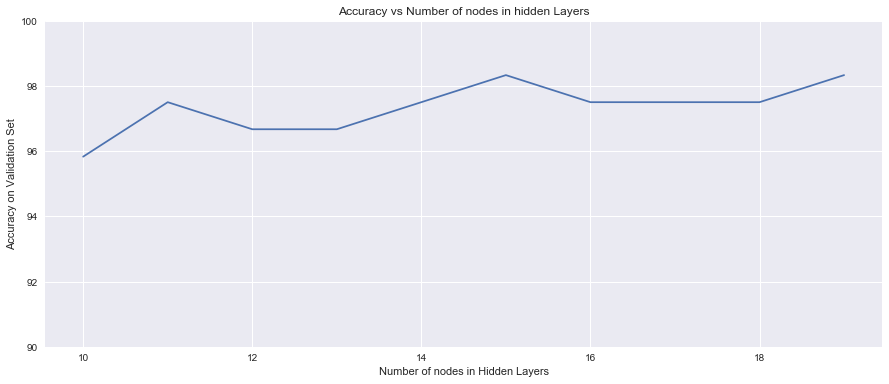

In [20]:
plt.ylim([90,100])
plt.plot(range(10,20),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [182]:
accuracy_validation = [None]*6
count = 0
for batchSize in range(16,22):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 30))
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count = count +1

Epoch 1/20
278/278 [==============================] - 22s 80ms/step - loss: 0.6923 - acc: 0.6223
Epoch 2/20
278/278 [==============================] - 0s 828us/step - loss: 0.6895 - acc: 0.6223
Epoch 3/20
278/278 [==============================] - 0s 1ms/step - loss: 0.6809 - acc: 0.6223
Epoch 4/20
278/278 [==============================] - 0s 995us/step - loss: 0.6393 - acc: 0.6295
Epoch 5/20
278/278 [==============================] - 0s 1ms/step - loss: 0.5178 - acc: 0.8561
Epoch 6/20
278/278 [==============================] - 0s 993us/step - loss: 0.3459 - acc: 0.9676
Epoch 7/20
278/278 [==============================] - 0s 826us/step - loss: 0.2210 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 725us/step - loss: 0.1394 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 1ms/step - loss: 0.0967 - acc: 0.9820
Epoch 10/20
278/278 [==============================] - 0s 1ms/step - loss: 0.0781 - acc: 0.9892
Epoch 11/20
278/278 [================

278/278 [==============================] - 0s 660us/step - loss: 0.6801 - acc: 0.6223
Epoch 5/20
278/278 [==============================] - 0s 629us/step - loss: 0.6532 - acc: 0.6691
Epoch 6/20
278/278 [==============================] - 0s 530us/step - loss: 0.5786 - acc: 0.9065
Epoch 7/20
278/278 [==============================] - 0s 450us/step - loss: 0.4387 - acc: 0.9676
Epoch 8/20
278/278 [==============================] - 0s 618us/step - loss: 0.2700 - acc: 0.9748
Epoch 9/20
278/278 [==============================] - 0s 685us/step - loss: 0.1587 - acc: 0.9820
Epoch 10/20
278/278 [==============================] - 0s 732us/step - loss: 0.1083 - acc: 0.9820
Epoch 11/20
278/278 [==============================] - 0s 653us/step - loss: 0.0853 - acc: 0.9820
Epoch 12/20
278/278 [==============================] - 0s 529us/step - loss: 0.0742 - acc: 0.9892
Epoch 13/20
278/278 [==============================] - 0s 497us/step - loss: 0.0676 - acc: 0.9892
Epoch 14/20
278/278 [================

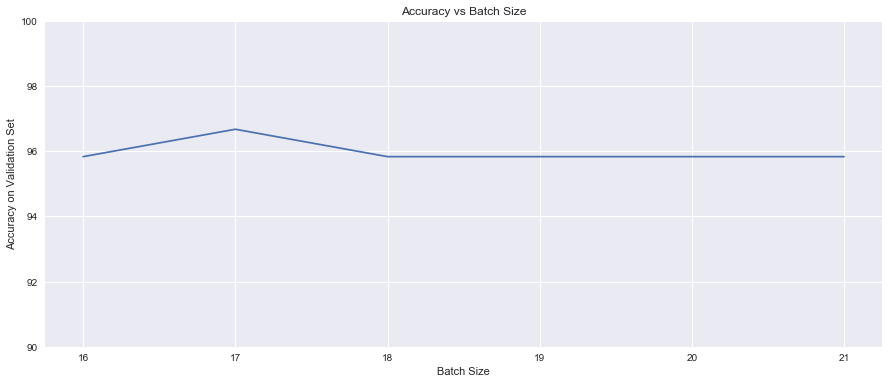

In [183]:
plt.ylim([90,100])
plt.plot(range(16,22),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

## I will stick with Batch size = 9
# Final NN after doing Hyper parameter tuning

In [191]:
accuracy_test = [None]*10
count = 0
for epoch in range(20,30):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 30))
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 17, nb_epoch = epoch)
    accuracy_test[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count = count +1

Epoch 1/20
278/278 [==============================] - 22s 78ms/step - loss: 0.6923 - acc: 0.6187
Epoch 2/20
278/278 [==============================] - 0s 763us/step - loss: 0.6892 - acc: 0.6223
Epoch 3/20
278/278 [==============================] - 0s 843us/step - loss: 0.6795 - acc: 0.6223
Epoch 4/20
278/278 [==============================] - 0s 680us/step - loss: 0.6323 - acc: 0.6223
Epoch 5/20
278/278 [==============================] - 0s 863us/step - loss: 0.5020 - acc: 0.6223
Epoch 6/20
278/278 [==============================] - 0s 1ms/step - loss: 0.3629 - acc: 0.7626
Epoch 7/20
278/278 [==============================] - 0s 1ms/step - loss: 0.3010 - acc: 0.9604
Epoch 8/20
278/278 [==============================] - 0s 1ms/step - loss: 0.2411 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 1ms/step - loss: 0.1633 - acc: 0.9856
Epoch 10/20
278/278 [==============================] - 0s 1ms/step - loss: 0.1060 - acc: 0.9892
Epoch 11/20
278/278 [==================

278/278 [==============================] - 0s 674us/step - loss: 0.0453 - acc: 0.9892
Epoch 23/23
278/278 [==============================] - 0s 609us/step - loss: 0.0440 - acc: 0.9892
Epoch 1/24
278/278 [==============================] - 18s 65ms/step - loss: 0.6922 - acc: 0.6223
Epoch 2/24
278/278 [==============================] - 0s 655us/step - loss: 0.6889 - acc: 0.6223
Epoch 3/24
278/278 [==============================] - 0s 637us/step - loss: 0.6782 - acc: 0.6223
Epoch 4/24
278/278 [==============================] - 0s 627us/step - loss: 0.6382 - acc: 0.6223
Epoch 5/24
278/278 [==============================] - 0s 625us/step - loss: 0.5108 - acc: 0.8741
Epoch 6/24
278/278 [==============================] - 0s 657us/step - loss: 0.3208 - acc: 0.9784
Epoch 7/24
278/278 [==============================] - 0s 640us/step - loss: 0.1837 - acc: 0.9820
Epoch 8/24
278/278 [==============================] - 0s 676us/step - loss: 0.1067 - acc: 0.9856
Epoch 9/24
278/278 [====================

278/278 [==============================] - 0s 900us/step - loss: 0.1309 - acc: 0.9820
Epoch 9/27
278/278 [==============================] - 0s 752us/step - loss: 0.0947 - acc: 0.9820
Epoch 10/27
278/278 [==============================] - 0s 807us/step - loss: 0.0777 - acc: 0.9856
Epoch 11/27
278/278 [==============================] - 0s 758us/step - loss: 0.0700 - acc: 0.9892
Epoch 12/27
278/278 [==============================] - 0s 824us/step - loss: 0.0650 - acc: 0.9892
Epoch 13/27
278/278 [==============================] - 0s 748us/step - loss: 0.0620 - acc: 0.9892
Epoch 14/27
278/278 [==============================] - 0s 818us/step - loss: 0.0593 - acc: 0.9892
Epoch 15/27
278/278 [==============================] - 0s 1ms/step - loss: 0.0575 - acc: 0.9892
Epoch 16/27
278/278 [==============================] - 0s 1ms/step - loss: 0.0557 - acc: 0.9892
Epoch 17/27
278/278 [==============================] - 0s 979us/step - loss: 0.0541 - acc: 0.9892
Epoch 18/27
278/278 [================

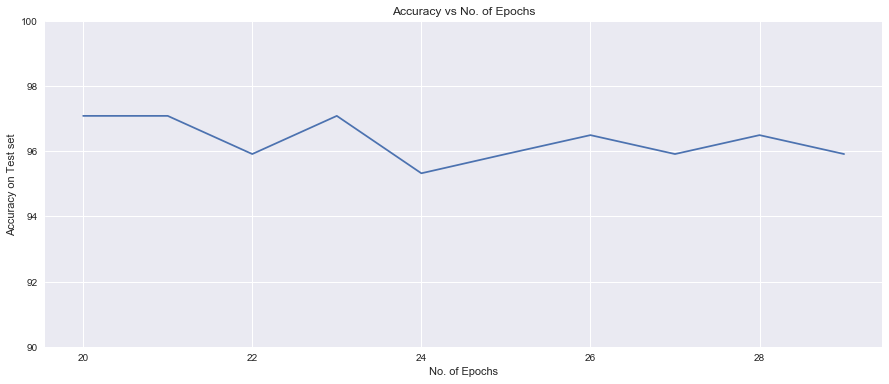

In [192]:
plt.ylim([90,100])
plt.plot(range(20,30),accuracy_test)
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy on Test set")

In [123]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier1,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier1,X_test, y_test) * 100, 2)))
print('Validation accuracy = {0}%'.format(np.round(accuracy_NN(classifier1,X_val, y_val) * 100, 2)))

Train accuracy = 98.92%
Test accuracy = 98.25%
Validation accuracy = 95.83%
